Following the work in 04-MLPClassification_LegoImages.ipynb

In [1]:
#import
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

import os

In [2]:
DATASET_PATH = 'datasets/Lego/train/'

In [3]:
!ls -l 'datasets/Lego/train/'

total 24
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 11214 Bush 3M friction with Cross axle
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 18651 Cross Axle 2M with Snap friction
drwxr-xr-x@ 381 annarienbester  staff  12192 Aug 19  2019 2357 Brick corner 1x2x2
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3003 Brick 2x2
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3004 Brick 1x2
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3005 Brick 1x1
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3022 Plate 2x2
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3023 Plate 1x2
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3024 Plate 1x1
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3040 Roof Tile 1x2x45deg
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 3069 Flat Tile 1x2
drwxr-xr-x@ 402 annarienbester  staff  12864 Aug 19  2019 32123 half Bush
drwxr-xr-x@ 402 annarienbester  staff  1286

In [4]:
# load images
def load_images(path):
    
    images_train = []
    labels_train = []
    
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)

        if not os.path.isdir(fullpath):
            continue

        images = os.listdir(fullpath)
        
        for image_filename in images:
            
            image_fullpath = os.path.join(fullpath, image_filename)

            if os.path.isdir(image_fullpath):
                continue
            
            img = cv2.imread(image_fullpath)

            images_train.append(img)
            labels_train.append(sub_folder)
            
    return np.array(images_train), np.array(labels_train)

In [5]:
# load in the image data
images_train, labels_train = load_images(DATASET_PATH)

datasets/Lego/train/3005 Brick 1x1
datasets/Lego/train/2357 Brick corner 1x2x2
datasets/Lego/train/3024 Plate 1x1
datasets/Lego/train/6632 Technic Lever 3M
datasets/Lego/train/3794 Plate 1X2 with 1 Knob
datasets/Lego/train/3040 Roof Tile 1x2x45deg
datasets/Lego/train/11214 Bush 3M friction with Cross axle
datasets/Lego/train/18651 Cross Axle 2M with Snap friction
datasets/Lego/train/3713 Bush for Cross Axle
datasets/Lego/train/32123 half Bush
datasets/Lego/train/3022 Plate 2x2
datasets/Lego/train/3069 Flat Tile 1x2
datasets/Lego/train/3023 Plate 1x2
datasets/Lego/train/3004 Brick 1x2
datasets/Lego/train/_DS_Store
datasets/Lego/train/3003 Brick 2x2
datasets/Lego/train/3673 Peg 2M


In [6]:
images_train.shape

(6379, 200, 200, 3)

In [8]:
labels_train.shape

(6379,)

Label:  3005 Brick 1x1


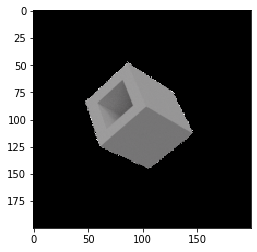

In [9]:
plt.imshow(images_train[10])

print('Label: ', labels_train[10])

Label:  3005 Brick 1x1


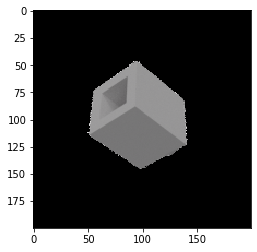

In [10]:
plt.imshow(images_train[11])

print('Label: ', labels_train[11])

Label:  3024 Plate 1x1


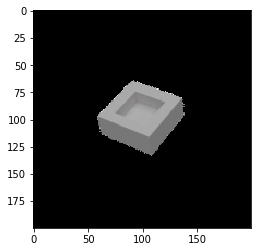

In [11]:
plt.imshow(images_train[1000])

print('Label: ', labels_train[1000])

In [12]:
X = images_train.reshape(images_train.shape[0], 
                         images_train.shape[1] * images_train.shape[2] * images_train.shape[3]) # batch size, height, width, channels

In [13]:
X.shape # the 120000 =  height*width*channels (200*200*3)

(6379, 120000)

In [14]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y = encoder.fit_transform(labels_train)

In [16]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)

x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [18]:
x_test.shape, y_test.shape

((1276, 120000), (1276,))

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
clf_image = MLPClassifier(activation = 'relu',
                          hidden_layer_sizes = (100, 100, 100), 
                          solver='adam', 
                          verbose=True,
                          max_iter=100)

In [21]:
clf_image.fit(x_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 27.68675891
Iteration 3, loss = 12.08767948
Iteration 4, loss = 8.61350655
Iteration 5, loss = 8.22653684
Iteration 6, loss = 6.24526562
Iteration 7, loss = 5.09157846
Iteration 8, loss = 4.24074517
Iteration 9, loss = 3.07970769
Iteration 10, loss = 2.71165885
Iteration 11, loss = 2.40237213
Iteration 12, loss = 2.80686666
Iteration 13, loss = 2.17489218


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
y_pred = clf_image.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)